In [8]:
!pip install  -q kaggle

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shravanlingayat","key":"15423742640164bd32ba71572de283b9"}'}

In [10]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
import kagglehub

path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

100%|██████████| 68.8M/68.8M [00:01<00:00, 46.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [13]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
# Imported a Fashion Dataset (Fashion NMIST)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
print(f"Train Reshaped as  : {train_images.shape}")

Train Reshaped as  : (60000, 28, 28, 1)


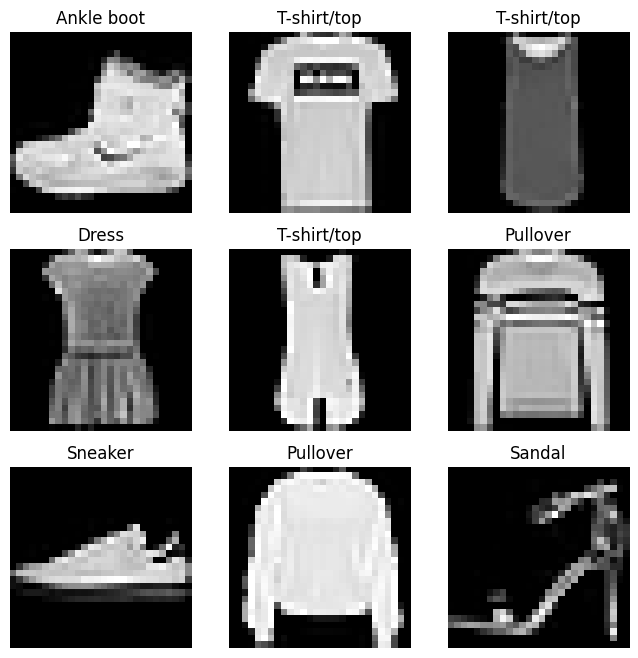

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# EDA PErformance
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i].reshape(28,28), cmap="gray")
    plt.title(class_names[train_labels[i]])
    plt.axis("off")
plt.show()

In [16]:
#Developing a CNN Model
from tensorflow.keras import models, layers
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(train_images,train_labels,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.7511 - loss: 0.6855 - val_accuracy: 0.8754 - val_loss: 0.3553
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8768 - loss: 0.3427 - val_accuracy: 0.8888 - val_loss: 0.3117
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8960 - loss: 0.2849 - val_accuracy: 0.8985 - val_loss: 0.2893
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9094 - loss: 0.2496 - val_accuracy: 0.9024 - val_loss: 0.2746
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9208 - loss: 0.2177 - val_accuracy: 0.8845 - val_loss: 0.3171


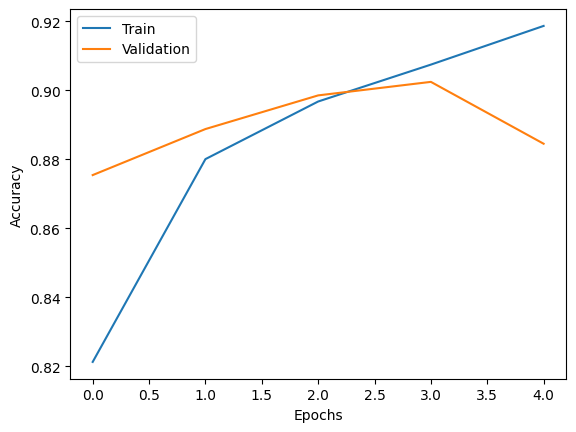

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"Test Accuracy : {test_acc}")
y_pred=model.predict(test_images).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8794 - loss: 0.3399
Test Accuracy : 0.8802000284194946
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagene=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,

)
datagene.fit(train_images)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense
model=Sequential([
    #going till 128 Patterns
    Conv2D(32,  (3,3),input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,  (3,3)),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation="relu"),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(10,activation='softmax')

])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(datagene.flow(train_images,train_labels,batch_size=32),epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.6835 - loss: 0.8419 - val_accuracy: 0.8195 - val_loss: 0.4808
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.7990 - loss: 0.5198 - val_accuracy: 0.8430 - val_loss: 0.4431
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - accuracy: 0.8282 - loss: 0.4513 - val_accuracy: 0.8615 - val_loss: 0.3821
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8430 - loss: 0.4170 - val_accuracy: 0.8515 - val_loss: 0.4004
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.8534 - loss: 0.3888 - val_accuracy: 0.8686 - val_loss: 0.3627
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8580 - loss: 0.3812 - val_accuracy: 0.8703 - val_loss: 0.3676
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.8669 - loss: 0.3561 - val_accuracy: 0.8717 - val_loss: 0.3628
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.8696 - loss: 0.35

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1000
           1       0.98      0.98      0.98      1000
           2       0.79      0.87      0.83      1000
           3       0.90      0.87      0.89      1000
           4       0.81      0.80      0.80      1000
           5       0.96      0.98      0.97      1000
           6       0.65      0.71      0.68      1000
           7       0.95      0.94      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



<function matplotlib.pyplot.show(close=None, block=None)>

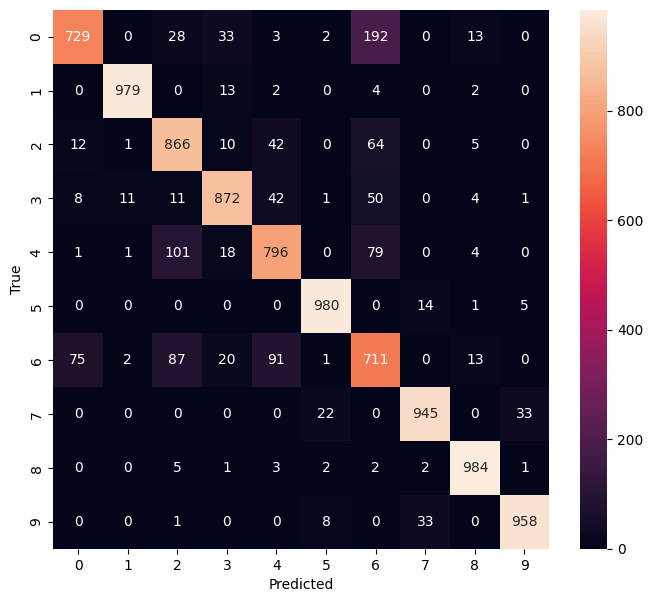

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import seaborn as sns
y_pred_c10=model.predict(test_images).argmax(axis=1)
Conf=confusion_matrix(test_labels,y_pred_c10)
print(classification_report(test_labels,y_pred_c10))

plt.figure(figsize=(8,7))
sns.heatmap(Conf,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show

In [4]:
import tensorflow as tf
#As CIFAR 10 dataset can be loaded directly

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of classes:", len(set(y_train.flatten())))

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use the loaded CIFAR-10 data (x_train, y_train, x_test, y_test)

datagenw = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Flow from the in-memory data instead of a directory
train_generator = datagenw.flow(x_train, y_train, batch_size=32, subset='training')
valuegen = datagenw.flow(x_test, y_test, batch_size=32, subset='validation')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Resizing
from tensorflow.keras.applications import MobileNetV2
base_model=MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable=False
model=Sequential([
    Resizing(224, 224, interpolation='bilinear'),
    base_model,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=valuegen)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.1024 - loss: 2.3178 - val_accuracy: 0.1080 - val_loss: 2.3026
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.1015 - val_loss: 2.3029
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.1024 - loss: 2.3027 - val_accuracy: 0.0990 - val_loss: 2.3031
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.1016 - loss: 2.3027 - val_accuracy: 0.0975 - val_loss: 2.3028
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.1042 - loss: 2.3026 - val_accuracy: 0.0980 - val_loss: 2.3026


In [8]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=valuegen)

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 180s 103ms/step - accuracy: 0.4208 - loss: 1.7396 - val_accuracy: 0.0995 - val_loss: 2.7839
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 123s 98ms/step - accuracy: 0.7992 - loss: 0.6054 - val_accuracy: 0.0995 - val_loss: 2.6597
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 123s 98ms/step - accuracy: 0.8654 - loss: 0.4030 - val_accuracy: 0.0970 - val_loss: 2.5207


In [9]:
model.save("cifar10-python.h5")
import tensorflow as tf
loaded_model=tf.keras.models.load_model('cifar10-python.h5')

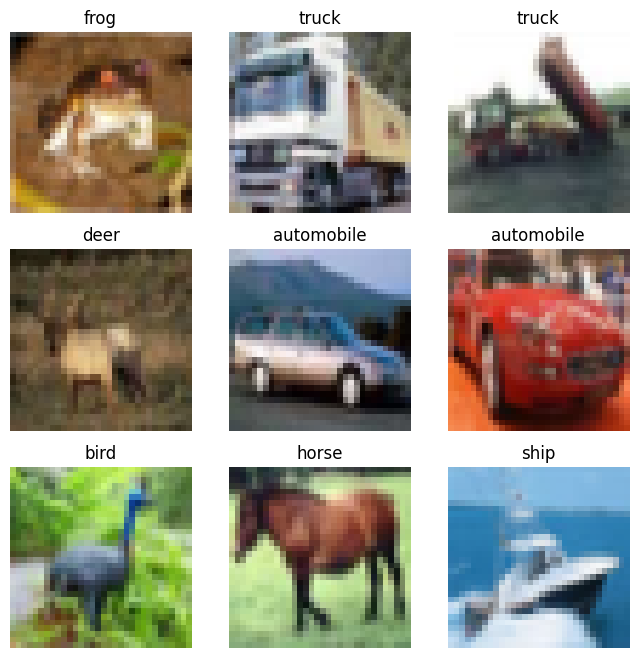

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
#As CIFAR 10 dataset can be loaded directly
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck','umbrella']
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [20]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Upload an image
uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension

    # Load trained model (replace with your model path if saved)
    model = load_model('cifar10-python.h5')

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    # Show image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()